<h1>Exploring bivariate numerical data</h1>

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data

You can use scatterplots to look for patters.

Driver is on the x access
What's being driven is on the y access.

bivariate = for each x data point, there is a y data point

<h2>Correlation coefficient</h2>

Measure how well a liner model can describe a relationship between two axis.

The correlation coefficient r measures the direction and strength of a linear relationship.

    It always has a value between -1 and 1.
    Strong positive linear relationships have values of r closer to 1.
    Strong negative linear relationships have values of r closer to −1.
    Weaker relationships have values of r closer to 0.

x&#772; = mean

s with small x = x standard deviation (similar to y)


The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [1]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [2]:
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


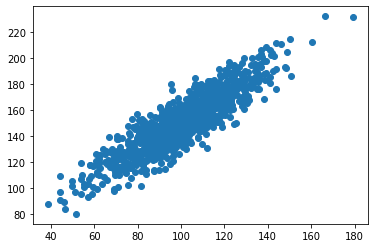

In [3]:
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [5]:
#data1

In [7]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [90]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
#TODO : Add spearman
def getCorrelationCoefficent(xArrayOfNumbers, yArrayOfNumbers, EL5TrueFalse=False):
    if(EL5TrueFalse is True):
        print("This determines how linear a set of x,y values are a scatterplot are. It is represnted as r")
    
    # calculate Pearson's correlation
    corr, _ = pearsonr(xArrayOfNumbers, yArrayOfNumbers)
    if(EL5TrueFalse is True):
        print('Pearsons correlation: %.3f' % corr)
        if(corr < -0.5):
            print("Noteable negative linear relation detected between points in data. The closer to -1, the closer the linear relationship.")
        if(corr > 0.5):
            print("Noteable postive linear relation detected between points in data. The closer to 1, the closer the linear relationship.")
        
    return corr

In [11]:
getCorrelationCoefficent(data1, data2, True)

This determines how linear a set of x,y values are a scatterplot are.
Pearsons correlation: 0.888
Noteable postive linear relation detected between points in data. The closer to 1, the closer the relationship.


0.8876119085795311

<h2>Least-squares regression equations</h2>

The predicted value (or line) of least squared is written as y hat.

It minimizes the squared value of each point, called residuals, on a graph. A point above a residual is a postive residual, a point below negative.

In [52]:
getEquationForRegressionLine(data1, data2, True)


First, get the slope (m). This is r (The coorelation coefficent) times the std Dev of y divided by the std dev of x
Next, we get the intercept (b). This is r times the average of x minus the average of y.
The final equation: yHat = 0.7789170522747931(x) + -72.55316473922403


'yHat = 0.7789170522747931(x) + -72.55316473922403'

In [62]:
from numpy import mean
from numpy import std
from scipy.stats import norm

def getEquationForRegressionLine(xArrayOfNumbers, yArrayOfNumbers, EL5TrueFalse=False):
    r = getCorrelationCoefficent(data1, data2, False)
    
    xListOfNumbers = xArrayOfNumbers.tolist()
    yListOfNumbers = yArrayOfNumbers.tolist()
    
    xStdDev = std(xListOfNumbers)
    yStdDev = std(yListOfNumbers)
    
    m = r * (xStdDev/yStdDev)
    
    b = (m * mean(xListOfNumbers)) - mean(yListOfNumbers)
    
    if(EL5TrueFalse is True):
        print("\nFirst, get the slope (m). This is r (The coorelation coefficent) times the std Dev of y divided by the std dev of x")
        print("Next, we get the intercept (b). This is r times the average of x minus the average of y.")
        print("The final equation: yHat = " + str(m) + "(x)" + " + " + str(b))
    
    
    return "yHat = " + str(m) + "(x)" + " + " + str(b)

def getPredictedValueForRegressionLine(xArrayOfNumbers, yArrayOfNumbers, predictedValue, EL5TrueFalse=False):
    r = getCorrelationCoefficent(data1, data2, False)
    
    xListOfNumbers = xArrayOfNumbers.tolist()
    yListOfNumbers = yArrayOfNumbers.tolist()
    
    xStdDev = std(xListOfNumbers)
    yStdDev = std(yListOfNumbers)
    
    m = r * (xStdDev/yStdDev)
    
    b = (m * mean(xListOfNumbers)) - mean(yListOfNumbers)
    
    yHat = m*predictedValue + b
    
    if(EL5TrueFalse is True):
        print("\nFirst, get the slope (m). This is r (The coorelation coefficent) times the std Dev of y divided by the std dev of x")
        print("Next, we get the intercept (b). This is r times the average of x minus the average of y.")
        print("The final equation: yHat = " + str(m) + "*" + str(predictedValue) + " + " + str(b) + ", making yHat " + str(yHat))
     
    return yHat

In [61]:
getPredictedValueForRegressionLine(data1, data2,4000, True)


First, get the slope (m). This is r (The coorelation coefficent) times the std Dev of y divided by the std dev of x
Next, we get the intercept (b). This is r times the average of x minus the average of y.
The final equation: yHat = 0.7789170522747931*4000 + -72.55316473922403, making yHat 3043.1150443599486


3043.1150443599486

<h2>Assessing the fit in least-squares regression</h2>

<h3>R squared </h3>

What  % of total variation is described by the line.

Close to 1 means the values are close to the line.

In [92]:
#https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python

def getRSquared(xArrayOfNumbers, yArrayOfNumbers, EL5TrueFalse=False):

    x_values = xArrayOfNumbers.tolist()
    y_values = yArrayOfNumbers.tolist()
    
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    
    if(EL5TrueFalse is True):
        print("\nR squared is % of total variation is described by the regression line. This would be used for x and y values around this line.")
        print("A value close to 1 means values are closer to the line.")
        print("*** RMSE will explicitly know how much our predictions deviate, on average, from the actual values in the dataset. This will give you more info than R squared if desired because R squared is a ratio.")
        print("The R Squared is : " + str(r_squared))
        
    
    return r_squared

In [89]:
getRSquared(data1, data2, True)


R squared is % of total variation is described by the regression line. This would be used for x and y values around this line.
A value close to 1 means values are closer to the line.
*** RMSE will explicitly know how much our predictions deviate, on average, from the actual values in the dataset. This will give you more info than R squared if desired because R squared is a ratio.
The R Squared is : 0.7878549002521983


0.7878549002521983

<h3>Root Mean Squared Error</h3>

How much a linear model disagrees with the actual data

Lower the number to 0, the better the fit of the data

In [119]:
#RETURNS PREDICTED VALUES FOR X IN A LIST
def getPredictedValues(xArrayOfNumbers, yArrayOfNumbers, EL5TrueFalse=False):
    r = getCorrelationCoefficent(data1, data2, False)
    
    xListOfNumbers = xArrayOfNumbers.tolist()
    yListOfNumbers = yArrayOfNumbers.tolist()
    
    xStdDev = std(xListOfNumbers)
    yStdDev = std(yListOfNumbers)
    
    m = r * (xStdDev/yStdDev)
    
    b = (m * mean(xListOfNumbers)) - mean(yListOfNumbers)
    
    y_predicted = []
    for i in xListOfNumbers:
        yHat = m*i + b
        y_predicted.append(yHat)
    return y_predicted

#How much a linear model disagrees with the actual data
#Lower the number to 0, the better the fit of the data

#https://towardsdatascience.com/metrics-and-python-850b60710e0c
#https://www.askpython.com/python/examples/rmse-root-mean-square-error
import math
def getRSME(xArrayOfNumbers, yArrayOfNumbers, EL5TrueFalse=False):
    y_actual = yArrayOfNumbers.tolist()
    y_predicted = getPredictedValues(xArrayOfNumbers, yArrayOfNumbers)
    
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    
    RMSE = math.sqrt(MSE)
    
    if(EL5TrueFalse is True):
        print("RSME is How much a linear model disagrees with the actual data. Lower the number to 0, the better the fit of the data.")
        print("Root Mean Square Error: " + str(RMSE))
        
    return RMSE

In [120]:
getRSME(data1,data2, True)

RSME is How much a linear model disagrees with the actual data. Lower the number to 0, the better the fit of the data.
Root Mean Square Error: 145.5428219724349


145.5428219724349

In [22]:
# Library from 2 - Summarizing qunative data

import statistics
import math

def meanOfList(num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(num)
    return avg

import numpy as np 
#DETERMINE THE SPREAD OF THE NUMBERS. HIGHER NUMBERS MEAN MORE SPREAD.
def IQROfList(numbersList, EL5TrueFalse=False):
    
    ELI5 = EL5TrueFalse
    
    if(ELI5 == True):
        print("IQR Determines how spread numbers are. Higher numbers mean more spread. IQR is better with outliers")
        print("\nFirst, it sorts the numbers. Then, takes the first 25% and finds the midpoint. Next, the last 75% and finds the midpoint. Then subtracts both midpoints for the IQR.")
        
    numbersList = sorted(numbersList, key=lambda x: x if x is not None else -math.inf)
    
    # First quartile (Q1) 
    Q1 = np.percentile(numbersList, 25, interpolation = 'midpoint') 
    
    if(ELI5 == True):
        print("\nQ1 (First 25%) midpoint:",Q1)
    
    # Third quartile (Q3) 
    Q3 = np.percentile(numbersList, 75, interpolation = 'midpoint') 
  
    if(ELI5 == True):
        print("\nQ3 (Last 75%) midpoint:",Q3)
    
    # Interquaritle range (IQR) 
    IQR = Q3 - Q1
    
    if(ELI5 == True):
        print("\nQ3-Q1 (the IQR)=",IQR)
    
    #return numbersList
    return IQR


def rangeOfList(numbersList):
    return numbersList[-1]-numbersList[0]

def simpleSkewCheck(mean, median, mode):
    #Simple Check for Skewness
    #Mode< Median< Mean : then the distribution is positively skewed
    #Mode> Median> Mean : then the distribution is negatively skewed
    #https://blog.usejournal.com/descriptive-statistics-with-python-6c7acb1d3671
    if(mode < median < mean):
        print("*** Simple Analysis : Distribution is positively skewed (mode < median < mean)")
        return True
    elif(mode > median > mean):
        print("*** Simple Analysis : Distribution is positively skewed (mode > median > mean)")
        return True
    else:
        return False

def populationVarianceOfList(numbersList, EL5TrueFalse=False):
    
    ELI5 = EL5TrueFalse

    meanNumber = meanOfList(numbersList)
    count = 0 
    sumList = 0

    if(ELI5 == True):
        print("The formula for population variance (sigma squared symbol) is the sum of all data points minus the mean. Square each and add them together. Then divide by the number of data points.\n")
        print("First, lets get the mean...\n")
        print("The mean (mu) is : ",meanNumber,"\n")
        print ("Next, take each value in the dataset, subtracting it from the mean and squaring, then adding all of these.\n")

    for t in numbersList:
        
        valueMinusMean = t-meanNumber
        valueMinusMeanSquared = valueMinusMean ** 2
        if(ELI5 == True):
            print ("Summing (",t,"-",meanNumber,")^2 =",valueMinusMeanSquared)
        count=count+1
        sumList = sumList + valueMinusMeanSquared

    if(ELI5 == True):        
        print("Total:", sumList)    
        print("\nNow, divide the sum by the number of data points: ", sumList, "divided by ", count, "gives the variance of...")

    Variance = sumList/count

    if(ELI5 == True):
        print("\nVariance: ", Variance,"\n")
        print("What does it mean? The smaller the variance, the less dispurse the dataset is.")
        
    return Variance

def sampleVarianceOfList(numbersList, EL5TrueFalse=False):
    
    ELI5 = EL5TrueFalse

    meanNumber = meanOfList(numbersList)
    count = 0 
    sumList = 0

    if(ELI5 == True):
        print("The formula for sample variance (sigma squared symbol) is the sum of all data points minus the mean-1. Square each and add them together. Then divide by the number of data points.\n")
        print("First, lets get the mean...\n")
        print("The mean (mu) is : ",meanNumber,"\n")
        print ("Next, take each value in the dataset, subtracting it from the mean and squaring, then adding all of these.\n")

    for t in numbersList:
        
        valueMinusMean = t-meanNumber
        valueMinusMeanSquared = valueMinusMean ** 2
        if(ELI5 == True):
            print ("Summing (",t,"-",meanNumber,")^2 =",valueMinusMeanSquared)
        count=count+1
        sumList = sumList + valueMinusMeanSquared

    if(ELI5 == True):        
        print("Total:", sumList)    
        print("\nNow, divide the sum by the number of data points: ", sumList, "divided by ", count-1, "gives the variance of...")

    Variance = sumList/count-1

    if(ELI5 == True):
        print("\nVariance: ", Variance,"\n")
        print("What does it mean? The smaller the variance, the less dispurse the dataset is.")
        
    return Variance

def populationStdDeviationOfList(numbersList, EL5TrueFalse=False):
    ELI5 = EL5TrueFalse
    
    if(ELI5 == True):
        print("Population Standard Deviation is how far away on average we are from the mean. The larger the standard deviation, the more spread out the data is.\n")
        
        print("To calculate Standard deviation (sigma) you take the square root of the variance.\n")
    
    if(ELI5 == True):
        variance = populationVarianceOfList(numbersList, True)
        print("First we need the variance which is \n", variance)
        
        standardDeviation = math.sqrt(variance)
        
        print("\nNow we take the square root of the variance (sigma squared), which is ",standardDeviation)
                                      
        return standardDeviation
    else:
        variance = populationVarianceOfList(numbersList)
        standardDeviation = math.sqrt(variance)                     
        return standardDeviation
    
def sampleStdDeviationOfList(numbersList, EL5TrueFalse=False):
    ELI5 = EL5TrueFalse
    
    if(ELI5 == True):
        print("Sample Standard Deviation is how far away on average we are from the mean. The larger the standard deviation, the more spread out the data is.\n")
        
        print("To calculate Standard deviation (sigma) you take the square root of the variance.\n")
    
    if(ELI5 == True):
        variance = sampleVarianceOfList(numbersList, True)
        print("First we need the variance which is \n", variance)
        
        standardDeviation = math.sqrt(variance)
        
        print("\nNow we take the square root of the variance (sigma squared), which is ",standardDeviation)
                                      
        return standardDeviation
    else:
        variance = sampleVarianceOfList(numbersList)
        standardDeviation = math.sqrt(variance)                     
        return standardDeviation
    
#TODO: Check for outliers. IQR is robust to outliers, whereas variance can be hugely affected by a single observation.

#Parameters: Data, if it's a sample or population set (true for sample (default) False for population)
def runDescriptiveStatisticsPopulation(numbersList):
    
    numbersList = sorted(numbersList, key=lambda x: x if x is not None else -math.inf)
    
    mean = meanOfList(numbersList)
    median = statistics.median(numbersList)
    mode = 'NaN'
    
    print("Population Mean : " + str(mean))
    print("Population Median : " + str(median))
    
    
    isSkewed = False
    # check different lengths, if different we have dups 
    if len(set(numbersList)) != len(numbersList):
        mode = statistics.mode(numbersList)
        modeCount = reduce(lambda sum, j: sum  + (1 if j == mode else 0), numbersList, 0) 
        modePercent = modeCount/len(numbersList) * 100
        
        print("Population Mode : " + str(mode) + " which is " + str(modePercent) + "% of population")
        
        isSkewed = simpleSkewCheck(mean, median, mode)
        
        if(isSkewed is True):
            print("*** Data is skewed. Mode or Median might be a better representation of the distribution")
            
            meanGreaterThanList = sum(i < mean for i in numbersList)
            percentMeanGreater = meanGreaterThanList / len(numbersList)
            
            if(percentMeanGreater > .75):
                print("*** Mean is greater than 75% of the data in the list, usually median should be used.")

            if(percentMeanGreater < .25):
                print("*** Mean is less than 75% of the data in the list, usually median should be used.")    
 
        else:
            print("*** Data is not skewed. Mean might be accurate representation of data")
    
    else:
        print("Mode : No Duplicates - " + mode)
        print("*** No mode to check for skew.")

    IQR = IQROfList(numbersList)
    print("IQR : " + str(IQR))
    
    outliers = getOutliersCount(numbersList, False, 1.5)
    print("Number of outliers based off 1.5 * IQR (the standard): ", outliers)
    
    if(outliers > 0):
        print("*** Because the outliers is greater than 0, the mid range could be influenced and may not be accurate.")
    else:
        print("*** No outliers detected, mid range may be an accurate represntation of the middle and represent the mean.")
    
    print("Mid-range : ", midRange(numbersList))
    
    stdDeviation = populationStdDeviationOfList(numbersList)
    
    print("Population Standard Deviation : " + str(stdDeviation))
    
    MAD = meanAbsoluteStandardDeviation(numbersList)
    print("Population Mean Absolute Deviation : " + str(MAD))
    
    if(isSkewed is True):
        print("*** Data is skewed. Because IQR uses the median(s) for calulations which are not influenced by skew (or less influenced), it better represents the center vs std deviation which uses the mean that is influenced by the skew.")
    else:
        print("*** Data is not skewed. Standard Deviation might be a good representation as the average from the center.")

#TODO: Check for outliers. IQR is robust to outliers, whereas variance can be hugely affected by a single observation.

#Parameters: Data, if it's a sample or population set (true for sample (default) False for population)
def runDescriptiveStatisticsSample(numbersList, ELI5TrueFalse=False):
    
    ELI5 = ELI5TrueFalse
    
    numbersList = sorted(numbersList, key=lambda x: x if x is not None else -math.inf)
    
    mean = meanOfList(numbersList)
    median = statistics.median(numbersList)
    mode = 'NaN'
    if(ELI5 is True):
            print("All numbers added together, then divided by the sample. Skew influnces this number.")
    print("Sample Mean : " + str(mean))
    
    if(ELI5 is True):
            print("The middle numbers sorted. It is less influenced by skew.")
    print("Sample Median : " + str(median))
    
    if(ELI5 is True):
            print("The Median on the left of the average subtracted by the median on the right of the average.")
            print("Higher numbers mean more spread out data.")
    IQR = IQROfList(numbersList)
    
    
    print("IQR : " + str(IQR))
    
    if(ELI5 is True):
            print("The Square root of variance. How far the number are from the average. Skew influences this.")
    stdDeviation = sampleStdDeviationOfList(numbersList)
    MAD = meanAbsoluteStandardDeviation(numbersList)
    
    if(ELI5 is True):
            print("average distance between each data value and the mean. Mean absolute deviation is a way to describe variation in a data set. Mean absolute deviation helps us get a sense of how \"spread out\" the values in a data set are.")
    print("Sample Mean Absolute Deviation : " + str(MAD))
    print("Sample Standard Deviation : " + str(stdDeviation))
    
    
from functools import reduce

def getOutliersCount(numbersList, EL5TrueFalse=False, Threshold=1.5):
    
    ELI5 = EL5TrueFalse
    
    if(ELI5 is True):
        print("*** < Q1 - 1.5 * IQR or > Q3 - 1.5 * IQR is the usual agreed upon.")
    
    IQR = IQROfList(numbersList)
    Q1 = np.percentile(numbersList, 25, interpolation = 'midpoint') 
    Q3 = np.percentile(numbersList, 75, interpolation = 'midpoint')
    outliersLeft = Q1 - Threshold*IQR
    outliersRight = Q3 + Threshold*IQR
    
    countRight = reduce(lambda sum, j: sum  + (1 if j > outliersRight else 0), numbersList, 0) 
    countLeft = reduce(lambda sum, j: sum  + (1 if j < outliersLeft else 0), numbersList, 0)
    
    countTotal = countRight + countLeft
    
    if(ELI5 is True):
        
        print("Total Outliers Right : ", countRight)
        print("Total Outliers Left : ", countLeft)
        print("Total Outliers Count : ", countTotal)
        
        print("\nAnything Left Of this is an Outlier: ", outliersLeft )
        print("Anything Right Of this is an Outlier : ", outliersRight)
    return countTotal

def midRange(numbersList, EL5TrueFalse=False):
    ELI5 = EL5TrueFalse
    
    if (ELI5 is True):
        print("* Mid Range is the average between the larges and smallest value in the dataset.")
        print("* It is highly influenced by outliers.")
        
    return (numbersList[0] + numbersList[-1])/2

def meanAbsoluteStandardDeviation(numbersList, EL5TrueFalse=False):
    ELI5 = EL5TrueFalse
    
    if (ELI5 is True):
        print("1. Get the mean, 2. Subtract the mean from every item,take the absolute value of each. Add them. 3. Divide by the number of Items.")
        print("MAD is good for normally distributed (bell curve) data.")
    
    mean = meanOfList(numbersList)
    count = 0
    total = 0
    for i in numbersList:
        if (ELI5 is True):
            print ("Adding Absolute Value of ",i, "-",mean)
    
        total = total + abs(i - mean)
        count = count + 1
    
    if (ELI5 is True):
        print("Total : ", total)
        print("Divided by:", count)
        print(total/count)
    
    return total/count


